# Time Series: Stock Market Analysis

Time Series data is a series of data points indexed in time order. In this notebook, I will discover and explore data from the stock market, particularly some tech-stocks (Apple, Amazon, Google, and Microsoft). I will show how to use yfinance to get stock information, and visualize different aspects of it using Seaborn and Matplotlib. I will take a look at a few ways of analyzing the risk of a stock, based on its previous performance history.

<hr style="border: 5px solid #003262;" />

## Getting the Data
The first step is to get the data and load it to memory. I will load my stock data from Yahoo Finance website. Yahoo Finance is a rich resource of financial market data and tools to find compelling investments. To get the data from Yahoo Finance, I will be using yfinance library which offers a threaded and Pythonic way to download market data from Yahoo. 

<hr style="border: 1px solid #fdb515;" />

## 1. What was the change in price of the stock overtime?

In this section I'll go over how to handle requesting stock information with pandas, and will show how to analyze basic attributes of a stock.

In [1]:
!pip install -q yfinance

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

!pip install pandas_datareader
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

from datetime import datetime

# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 1.8 MB/s eta 0:00:00a 0:00:01
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-10-23,124.629997,127.879997,123.980003,126.559998,126.559998,48260000,AMAZON
2023-10-24,127.739998,128.800003,126.339996,128.559998,128.559998,46477400,AMAZON
2023-10-25,126.040001,126.339996,120.790001,121.389999,121.389999,74577500,AMAZON
2023-10-26,120.629997,121.639999,118.349998,119.570000,119.570000,100419500,AMAZON
2023-10-27,126.199997,130.020004,125.519997,127.739998,127.739998,125309300,AMAZON
2023-10-30,129.720001,133.000000,128.559998,132.710007,132.710007,72485500,AMAZON
2023-10-31,132.750000,133.570007,131.710007,133.089996,133.089996,51589400,AMAZON
2023-11-01,133.960007,137.350006,133.710007,137.000000,137.000000,61529400,AMAZON
2023-11-02,138.729996,138.809998,136.470001,138.070007,138.070007,52236700,AMAZON


Reviewing the content of our data, we can see that the data is numeric and the date is the index of the data. It needs to be mentioned that weekends are missing from the records.

### Descriptive Statistics about the Data

In [8]:
# Some summary Stats
display(AAPL.describe())
display(AMZN.describe())

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,164.809241,166.499520,163.372560,165.043920,164.716841,6.337517e+07
std,18.521298,18.351663,18.690551,18.482674,18.646926,1.914566e+07
min,126.010002,127.769997,124.169998,125.019997,124.488869,3.145820e+07
25%,149.010002,150.982502,147.489998,149.784996,149.148651,5.025850e+07
50%,169.425003,171.044998,167.889999,169.984993,169.753555,5.846765e+07
75%,178.312504,180.052498,177.110004,178.555000,178.554108,7.070555e+07
max,196.240005,198.229996,195.279999,196.449997,196.185074,1.601569e+08


,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,112.748320,114.266640,111.200600,112.792720,112.792720,6.375186e+07
std,18.043651,18.075547,18.020240,18.026191,18.026191,2.300440e+07
min,82.800003,83.480003,81.430000,81.820000,81.820000,2.826480e+07
25%,96.869999,97.977501,95.034998,96.752499,96.752499,4.845440e+07
50%,108.130001,110.764999,107.425003,110.005001,110.005001,5.849810e+07
75%,129.712502,131.342495,128.332504,129.330002,129.330002,7.242042e+07
max,145.080002,145.860001,142.949997,144.850006,144.850006,1.734149e+08


We have only 250 records in one year because weekends are not included in the data.

### Information About the Data

In [9]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-11-07 to 2023-11-03
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float64
 5   Volume        250 non-null    int64  
 6   company_name  250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


### Closing Price

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

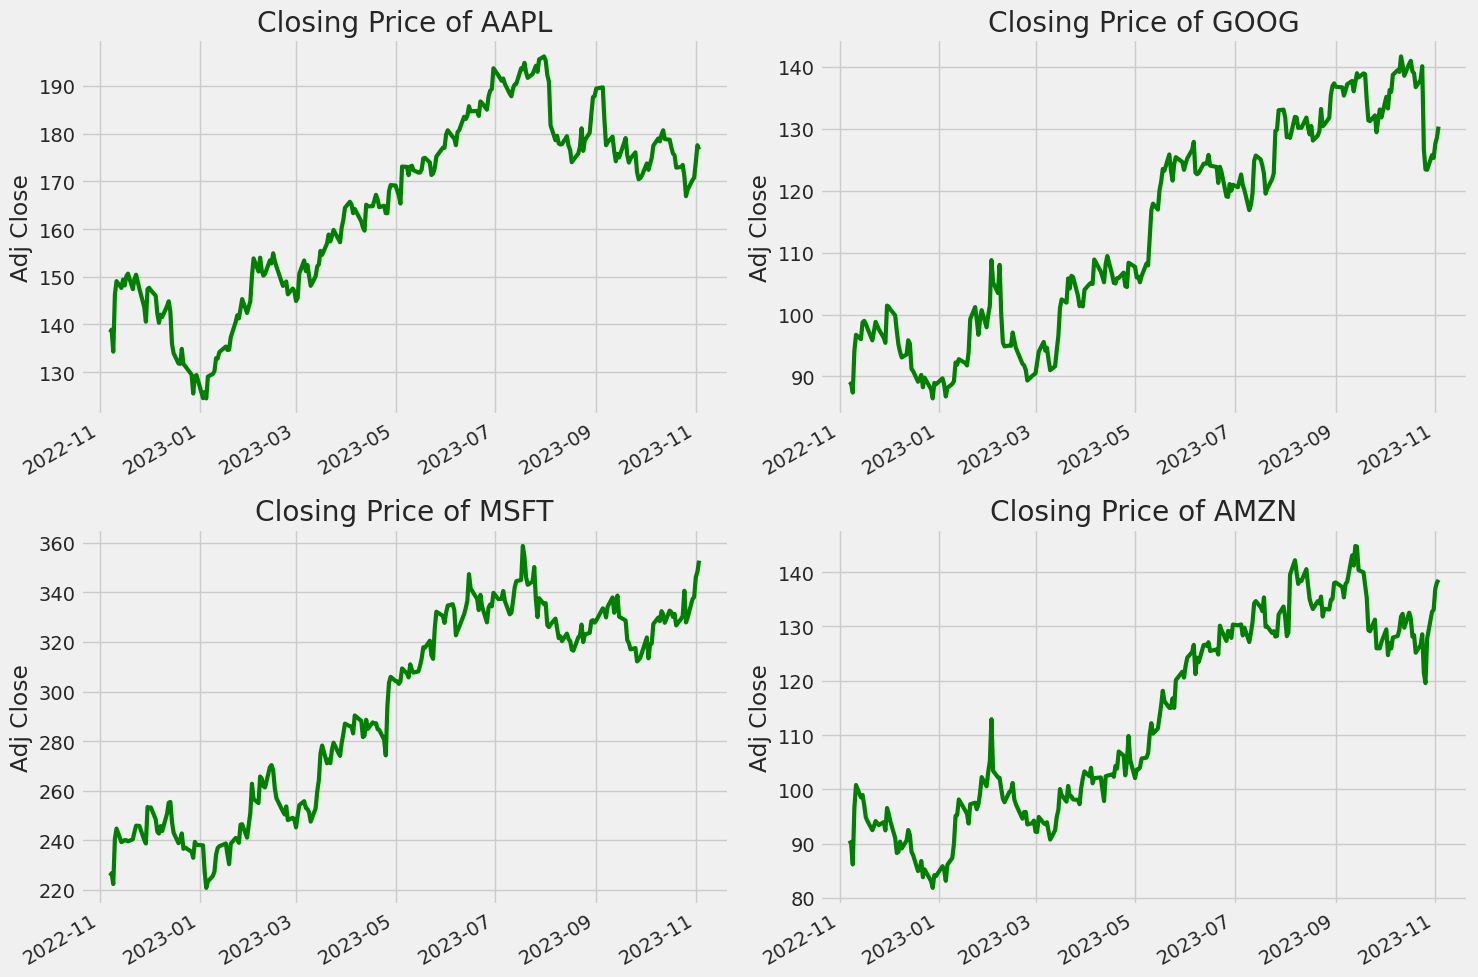

In [21]:
# Let's analyze a historical view of the closing price
plt.figure(figsize = (15, 10))
plt.subplots_adjust(top = 1.25, bottom = 1)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot(color = 'green', linewidth = 3)
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

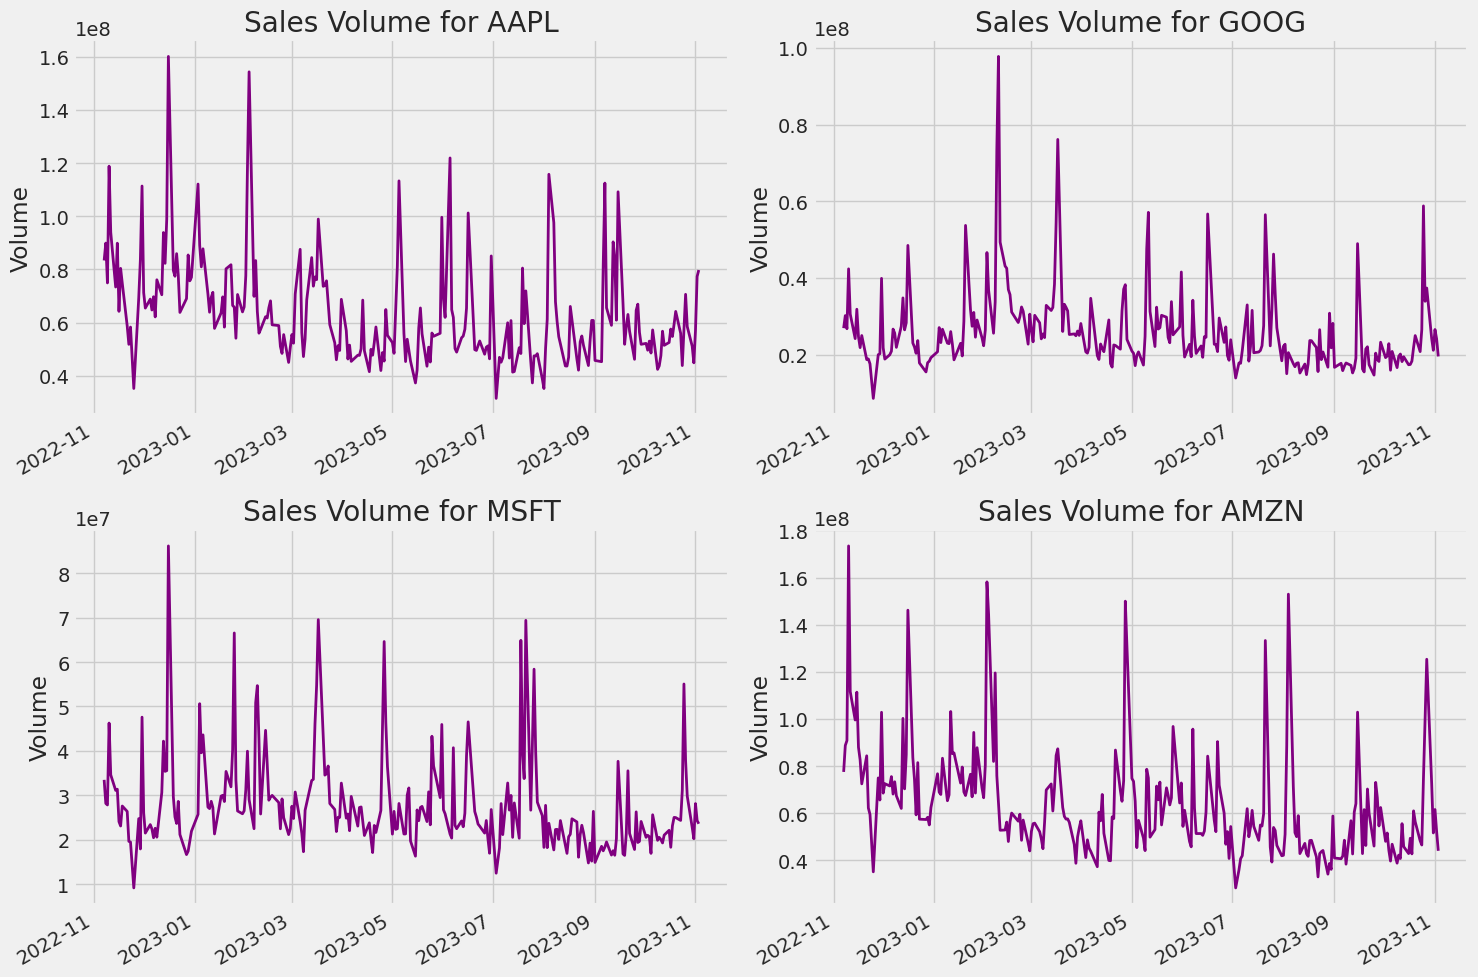

In [20]:
# Let's now plot the total volume of stock being traded each day
plt.figure(figsize = (15, 10))
plt.subplots_adjust(top = 1.25, bottom = 1)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot(color = 'purple', linewidth = 2)
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

<hr style="border: 1px solid #fdb515;" />

## 2. Plotting the moving average of stocks

The moving average (MA) is a tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

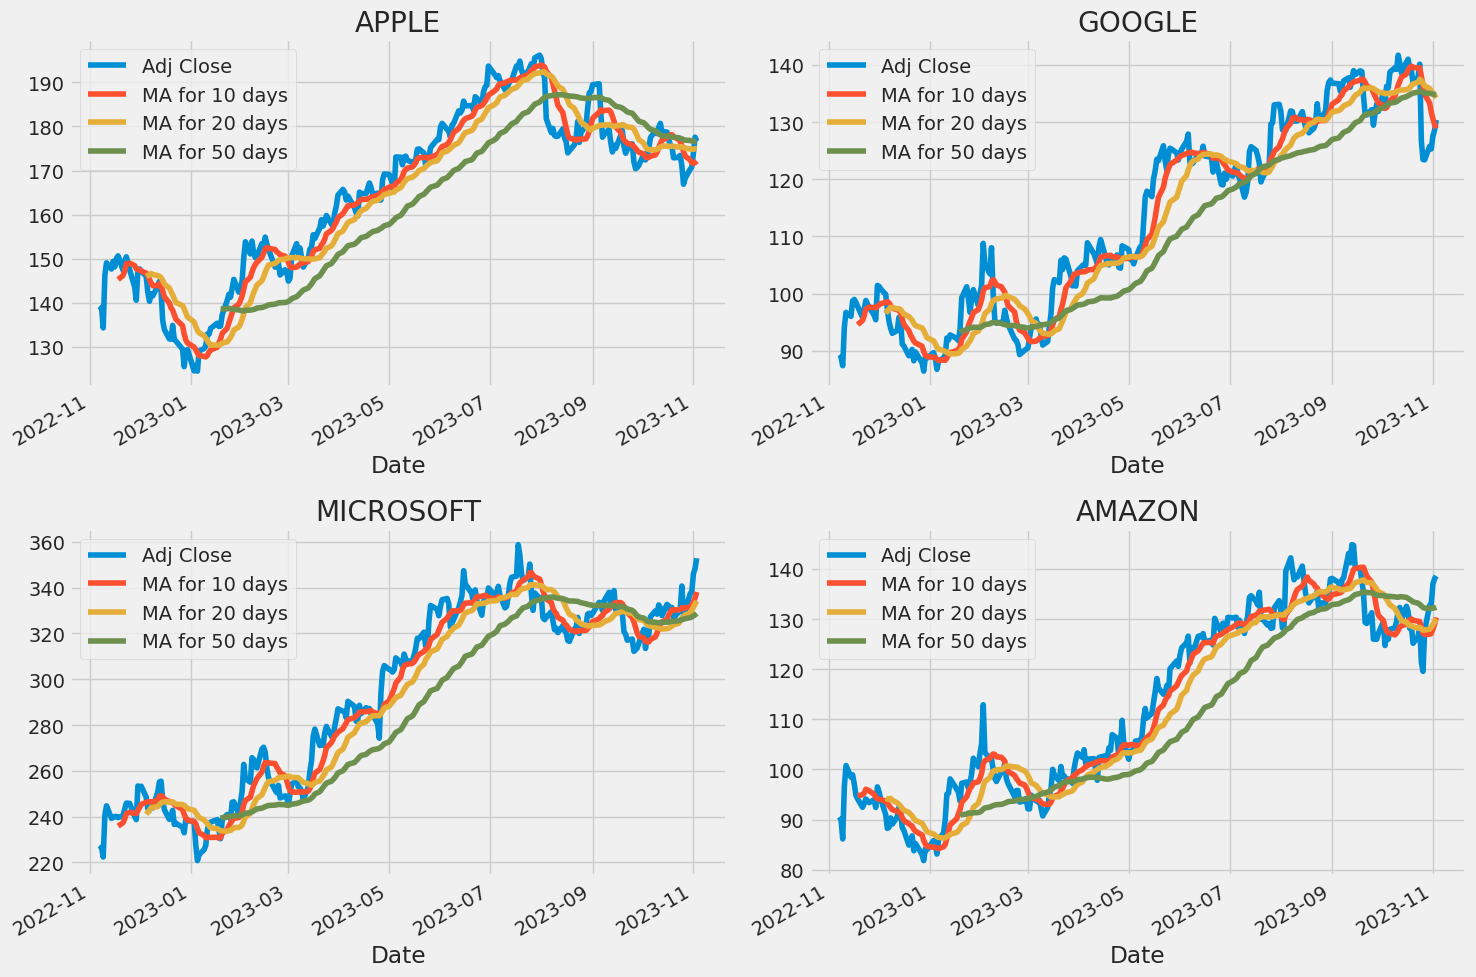

In [22]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax = axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax = axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax = axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax = axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

<hr style="border: 1px solid #fdb515;" />

## 3. The daily return of the stock on average

Now as we've seen some baseline analysis, let's dive a little deeper as I will now analyze the risk of the stock. In order to do so I'll need to take a closer look at the daily changes of the stock, and not just its absolute value.

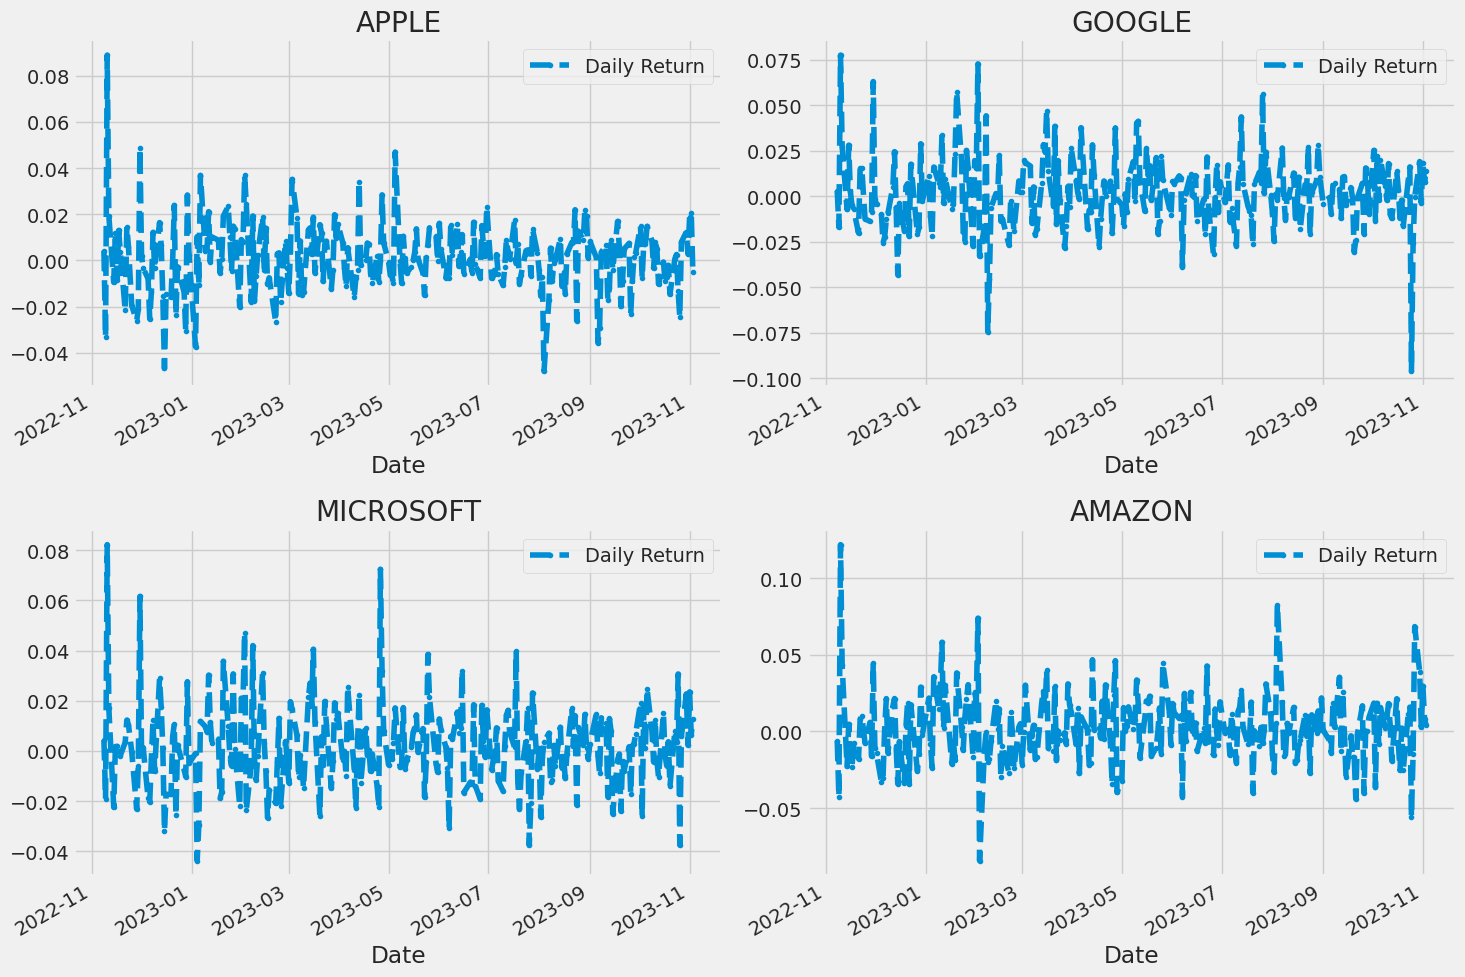

In [25]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax = axes[0,0], legend = True, linestyle = '--', marker = '.')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax = axes[0,1], legend = True, linestyle = '--', marker = '.')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax = axes[1,0], legend = True, linestyle = '--', marker = '.')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax = axes[1,1], legend = True, linestyle = '--', marker = '.')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

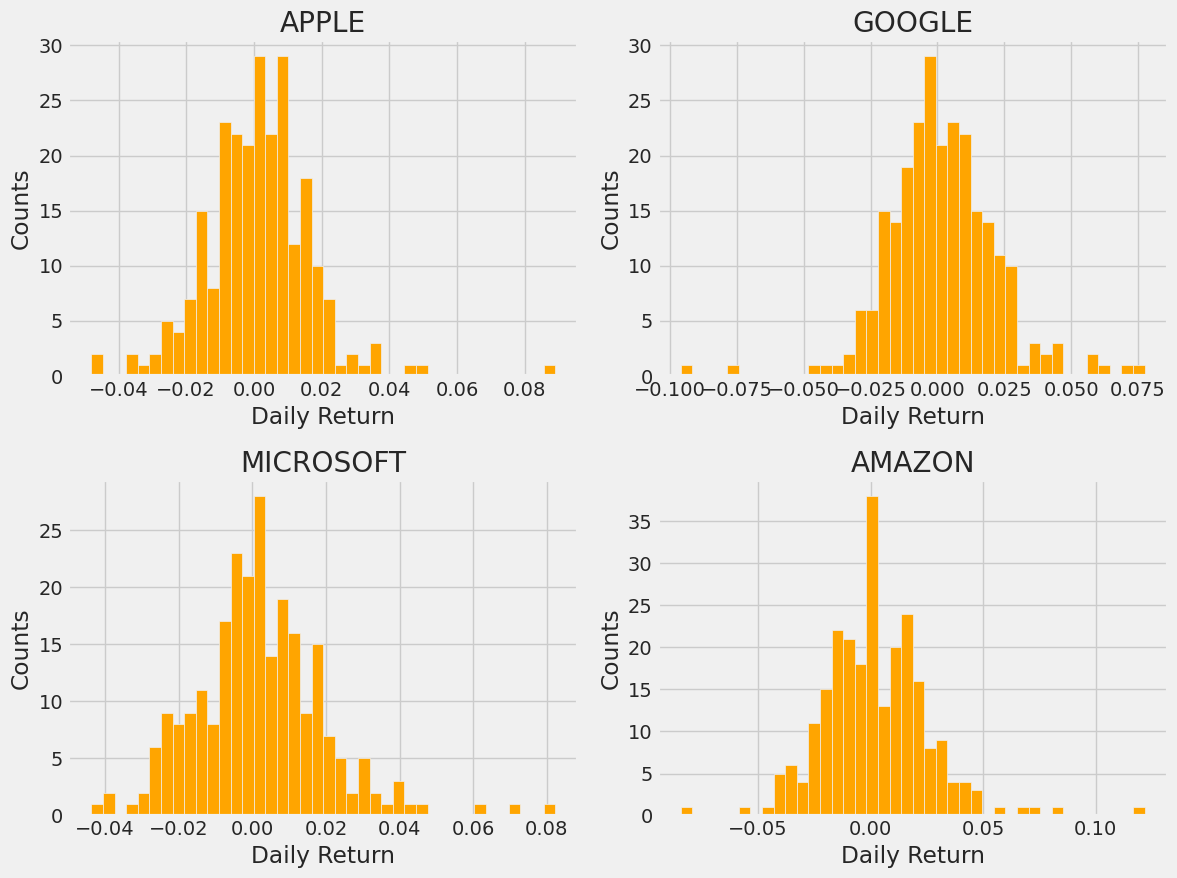

In [29]:
plt.figure(figsize = (12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins = 40, color = 'orange')
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

<hr style="border: 1px solid #fdb515;" />

## 4. Correlation between different stocks closing prices

In [30]:
closing_df = pdr.get_data_yahoo(tech_list, start = start, end = end)['Adj Close']

tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-11-07,NaN,NaN,NaN,NaN
2022-11-08,0.004175,-0.006075,0.002933,0.004389
2022-11-09,-0.033190,-0.042676,-0.016983,-0.019050
2022-11-10,0.088974,0.121778,0.077460,0.082268
2022-11-11,0.019269,0.043051,0.027185,0.016997


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

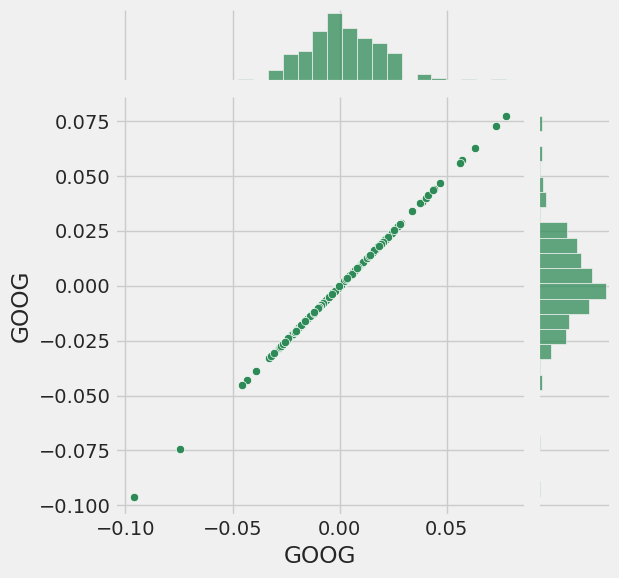

In [32]:
# Comparing Google to itself has to show a perfectly linear relationship
sns.jointplot(data = tech_rets, x = 'GOOG', y = 'GOOG', color = 'seagreen')

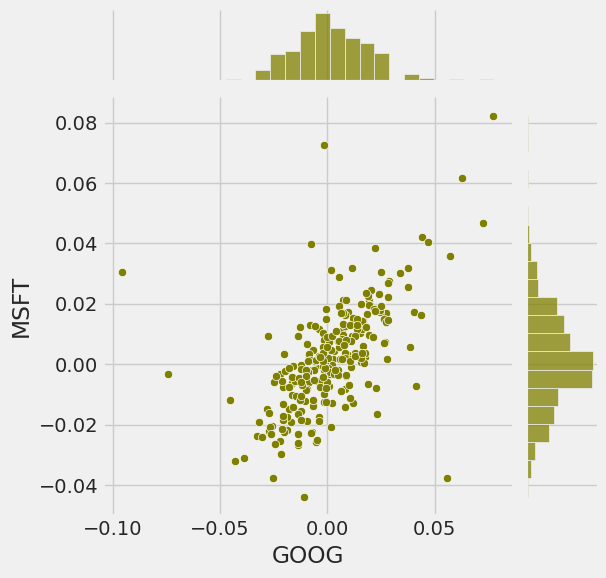

In [40]:
# Let's now compare the daily returns of Google and Microsoft
sns.jointplot(data = tech_rets, x = 'GOOG', y = 'MSFT', color = 'olive')

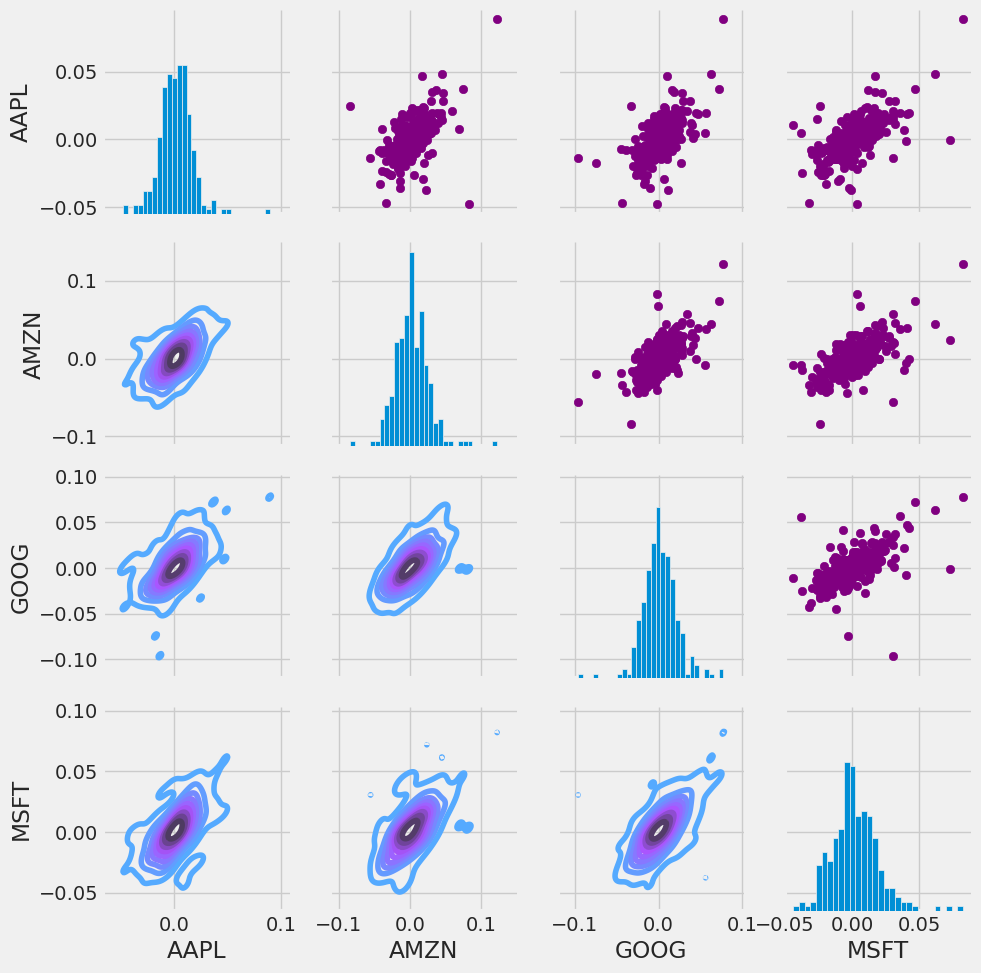

In [42]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

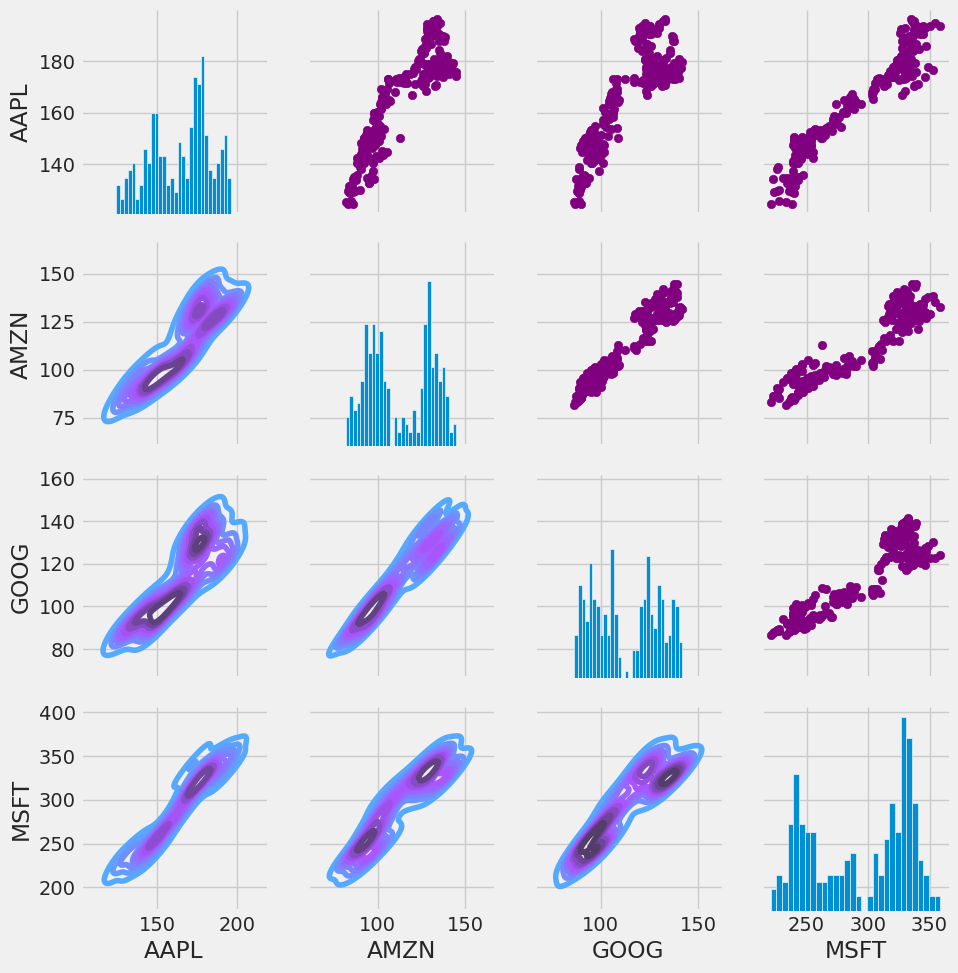

In [43]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

Text(0.5, 1.0, 'Correlation of stock closing price')

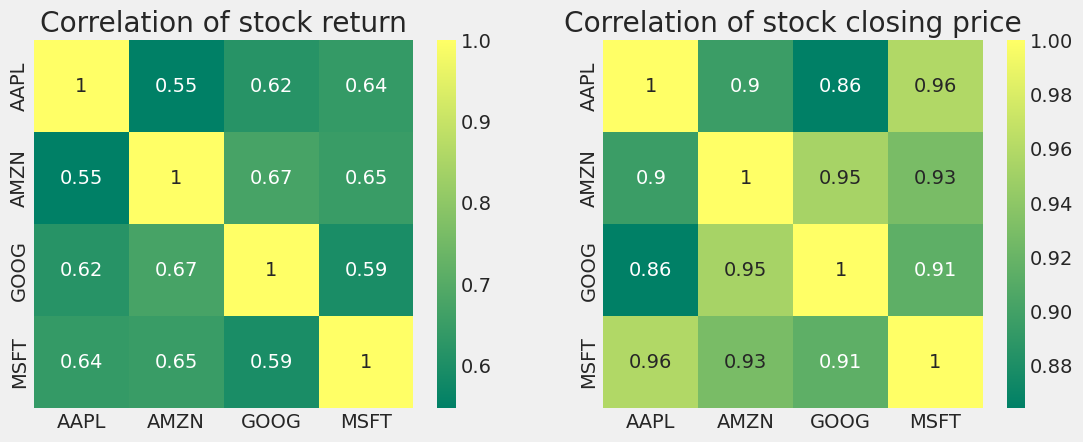

In [44]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Just like we suspected in our `PairPlot` we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

<hr style="border: 1px solid #fdb515;" />

## 5. How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

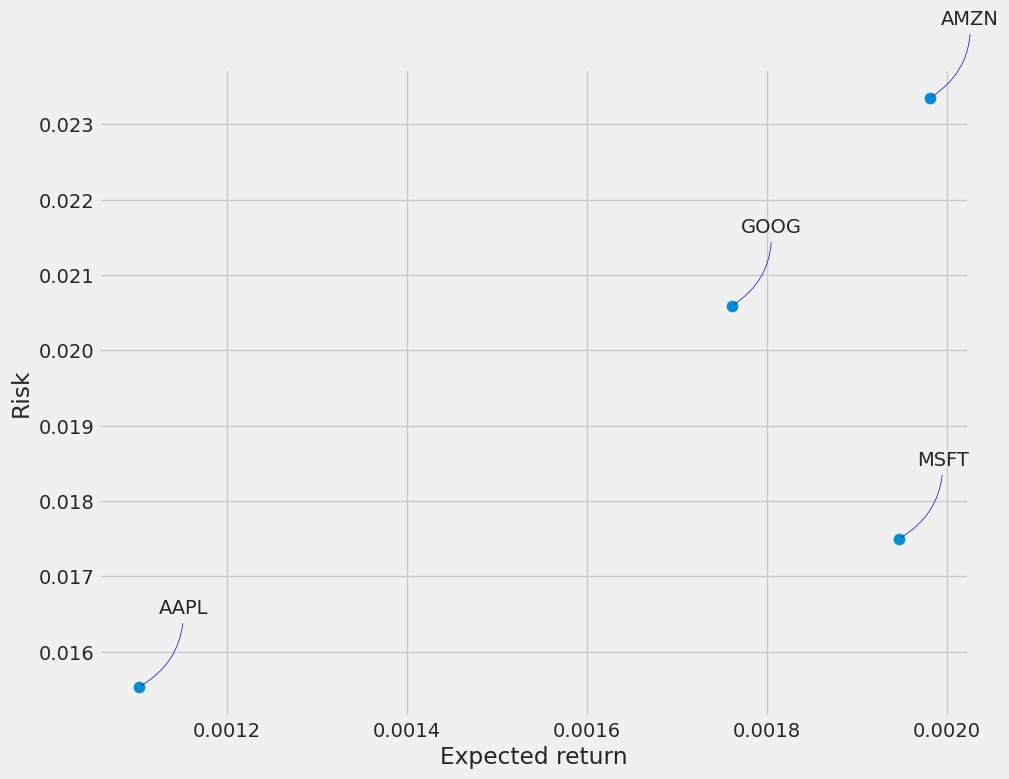

In [46]:
rets = tech_rets.dropna()
area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy = (x, y), xytext = (50, 50), textcoords = 'offset points', ha = 'right', va = 'bottom', 
                 arrowprops = dict(arrowstyle = '-', color = 'blue', connectionstyle = 'arc3,rad=-0.3'))

<hr style="border: 1px solid #fdb515;" />

## 6. Predicting the closing price of AAPL

In [50]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start = '2012-01-01', end = datetime.now())
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.466093,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.533087,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.672230,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.804705,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.784391,394024400
...,...,...,...,...,...,...
2023-10-30,169.020004,171.169998,168.869995,170.289993,170.289993,51131000
2023-10-31,169.350006,170.899994,167.899994,170.770004,170.770004,44846000
2023-11-01,171.000000,174.229996,170.119995,173.970001,173.970001,56934900


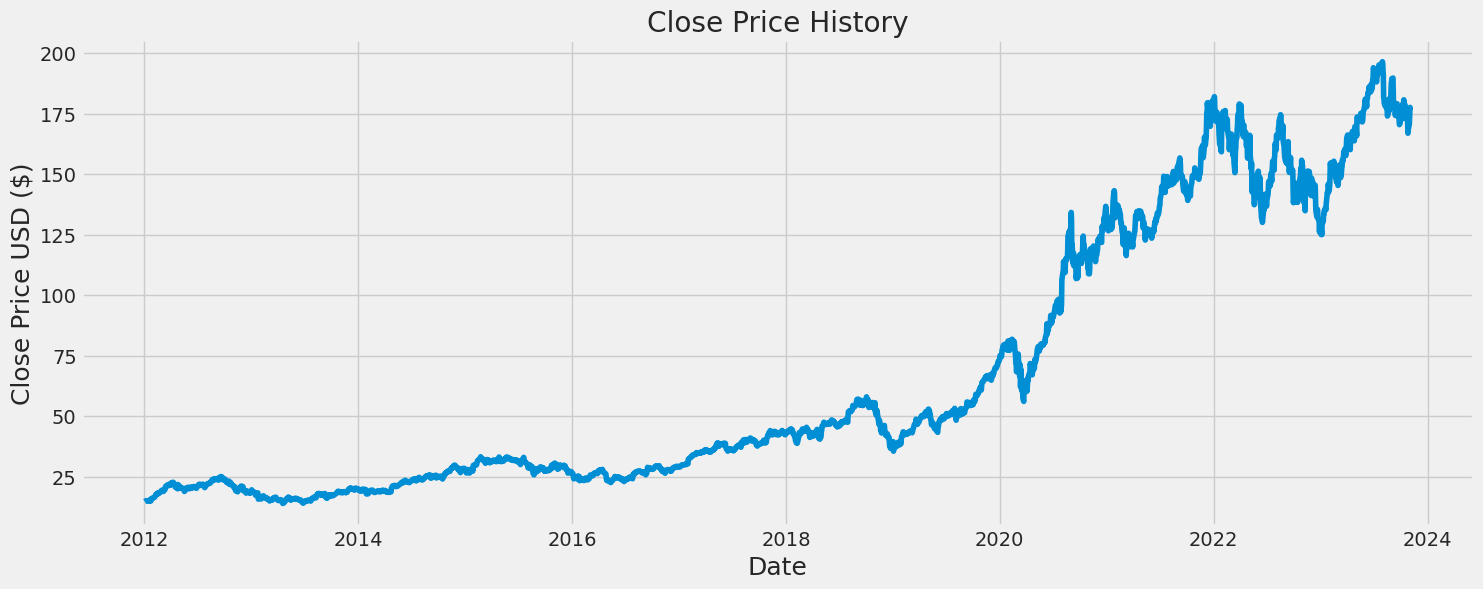

In [51]:
plt.figure(figsize = (16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show()

In [52]:
data = df.filter(['Close'])
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * .95))

training_data_len

2831

In [53]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00405082],
       [0.0044833 ],
       [0.00538153],
       ...,
       [0.87682363],
       [0.89654942],
       [0.89150832]])

In [54]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00582575, 0.00721712, 0.00584728,
       0.01098419, 0.01058694, 0.01110552, 0.01222684, 0.01290588,
       0.01284914, 0.01263975, 0.0135321 , 0.01437162, 0.01532269,
       0.01685887, 0.02008583, 0.02013475, 0.02193121, 0.02327365,
       0.02096645, 0.02185489, 0.02183728, 0.02432844, 0.02397423,
       0.02462979, 0.02580786, 0.02646344, 0.02835186, 0.02972757,
       0.03012483, 0.03026377, 0.02791156, 0.02734404, 0.0274282 ,
       0.02963952, 0.03026182, 0.0315984 , 0.03474903, 0.0389525 ,
       0.03816582, 0.03816777, 0.04120687, 0.04215794, 0.04148084,
       0.04086246, 0.04021863, 0.04235754, 0.04382523, 0.04443971])]
[0.04292113229660477]

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00

In [55]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2023-11-05 21:13:15.145744: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-05 21:13:15.358176: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-05 21:13:15.365092: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-11-05 21:13:15.365122: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

2771/2771 [==============================] - 91s 31ms/step - loss: 0.0015


In [58]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 0s 27ms/step


5.914458905065476

/tmp/ipykernel_30/2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


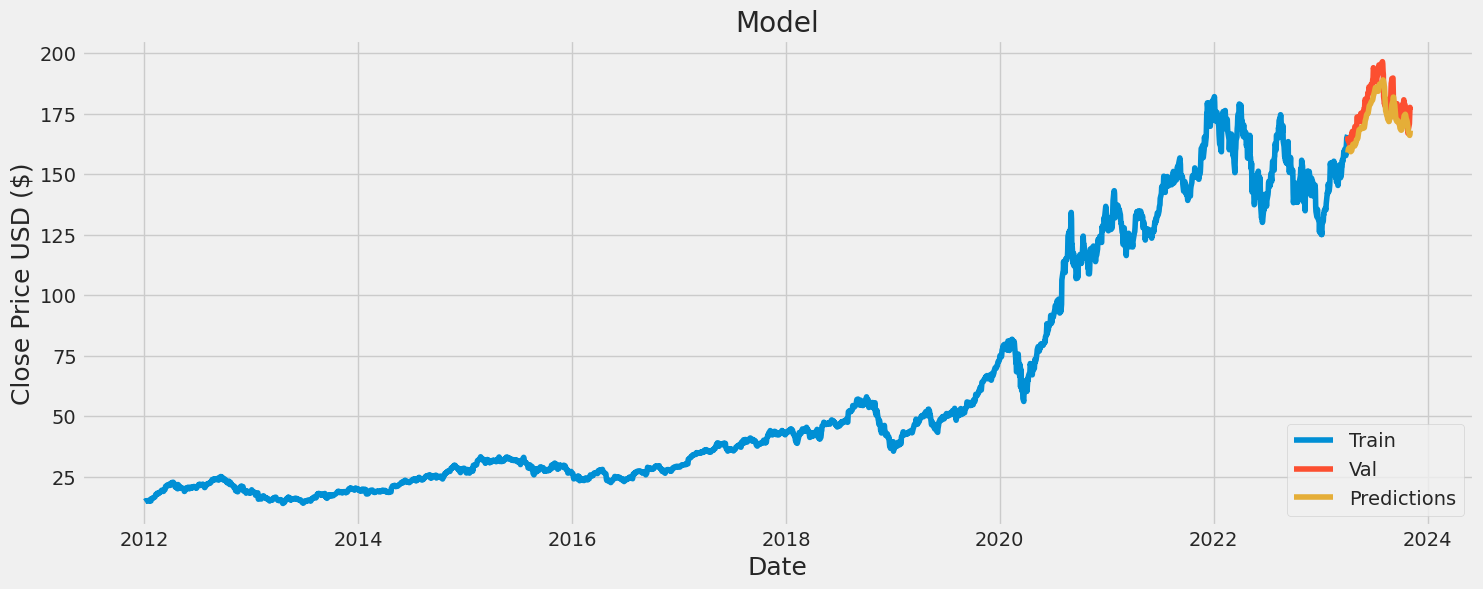

In [59]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [62]:
# Show the valid and predicted prices
valid.head(10)

,Close,Predictions
Date,,
2023-04-04,165.630005,158.887939
2023-04-05,163.759995,160.015427
2023-04-06,164.660004,160.588898
2023-04-10,162.029999,160.950516
2023-04-11,160.800003,160.728409
2023-04-12,160.100006,160.088501
2023-04-13,165.559998,159.243942
2023-04-14,165.210007,159.284515
2023-04-17,165.229996,159.659073
